In [2]:
%pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Anil Rathod\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [3]:
# Load training data
df_train = pd.read_csv("../Pract 4/Google_Stock_Price_Train.csv")

# Extract only 'Open' column and reshape
training_data = df_train[['Open']].values

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
training_scaled = scaler.fit_transform(training_data)

# Create 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, len(training_scaled)):
    X_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape to fit LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))


In [6]:
# Build the RNN Model

model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))

# Output layer
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')


In [5]:
# Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 0.1050
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0022
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0012
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0013
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0011
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0014
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0011
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0012
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0011
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0010
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0011
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0011
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0011
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0011
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0010
Epo

In [7]:
# Prepare the Test Data

In [8]:
# Load test data
df_test = pd.read_csv("../Pract 4/Google_Stock_Price_Test.csv")
real_stock_price = df_test[['Open']].values

# Combine train and test for continuity
total_data = pd.concat((df_train['Open'], df_test['Open']), axis=0)
model_inputs = total_data[len(total_data) - len(df_test) - 60:].values.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

# Create test inputs
X_test = []

for i in range(60, len(model_inputs)):
    X_test.append(model_inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [9]:
# Make Predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


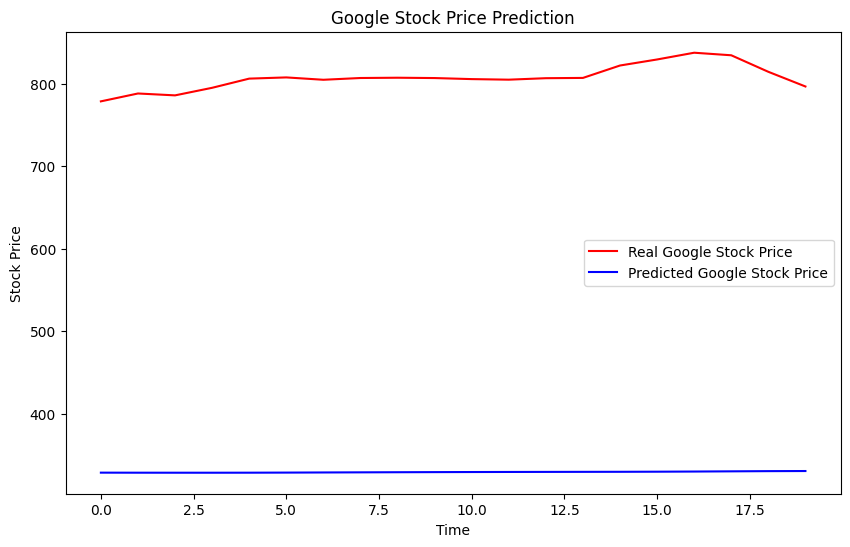

In [10]:
# Visualize the Results
plt.figure(figsize=(10,6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
